In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [60]:
two_to_one_df = pd.read_csv("results/results_2_to_1_new_emip.csv")
one_to_one_df = pd.read_csv("results/results_1_to_1_new_emip.csv")
two_to_one_df.columns

Index(['Unnamed: 0', 'rmse', 'oos_rmse', 'FGI', 'in_study_prediction',
       'in_study_labels', 'oos_prediction', 'oos_labels',
       'dimensionality_reduction', 'out_of_study', 'in_study',
       'feature_combinations'],
      dtype='object')

In [61]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps": [
        "heatmaps_*",
    ],
    "fft": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov": [
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch": [
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration": [
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length": [
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration": [
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

baselines = {
    "cscw": 0.2054194369131811,
    "emip": 0.31011607853729956,
    "fractions": 0.22897823445668405,
    "emip_fractions": 0.2943192380673428,
    "fractions_cscw": 0.23408157826890597,
    "emip_cscw": 0.28871689591649174,
}

oos_baselines = {
    "cscw": 0.32471610114605565,
    "emip": 0.432999224871373,
    "fractions": 0.3569925826393109,
    "emip_fractions": 0.4171820619321137,
    "fractions_cscw": 0.3537846986139497,
    "emip_cscw": 0.4084394493388968,
}


random_baselines = {
    "cscw": 0.35408194888273653,
    "emip": 0.4241358322246148,
    "fractions": 0.39295164906188074,
    "emip_fractions": 0.4170846635199361,
    "fractions_cscw": 0.37619048780763514,
    "emip_cscw": 0.40841293420269603,
}



name_mapping = {
    "['cscw']": "cscw",
    "['emip']": "emip",
    "['fractions']": "fractions",
    "['emip', 'fractions']": "emip_fractions",
    "['fractions', 'cscw']": "fractions_cscw",
    "['emip', 'cscw']": "emip_cscw",
    "['fractions', 'emip']": "emip_fractions",
    "['cscw', 'fractions']": "fractions_cscw",
    "['cscw', 'emip']": "emip_cscw",
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
map_names = lambda x: name_mapping.get(str(x), x)
two_to_one_df["feature_combinations"] = two_to_one_df["feature_combinations"].map(
    inv_map
)
two_to_one_df["in_study"] = two_to_one_df["in_study"].map(map_names)
two_to_one_df["baseline"] = two_to_one_df.loc[:, "in_study"].map(baselines)
two_to_one_df["oos_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
two_to_one_df["random_baseline"] = two_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
two_to_one_df["oos_random_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(random_baselines)


one_to_one_df["feature_combinations"] = one_to_one_df["feature_combinations"].map(
    inv_map
)
one_to_one_df["in_study"] = one_to_one_df["in_study"].map(map_names)
one_to_one_df["baseline"] = one_to_one_df.loc[:, "in_study"].map(baselines)
one_to_one_df["oos_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
one_to_one_df["random_baseline"] = one_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
one_to_one_df["oos_random_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(
    random_baselines
)


In [62]:
def filter_on_baselines(df):
    return df[(df["rmse"] < df["baseline"]) & (df["oos_rmse"] < df["oos_baseline"])]

print(filter_on_baselines(one_to_one_df).loc[:,"FGI"].min(), "smallest FGI 1to1")
print(filter_on_baselines(two_to_one_df).loc[:,"FGI"].min(), "smallest FGI 2to1")

0.0076703767 smallest FGI 1to1
0.0070310018000000005 smallest FGI 2to1


<AxesSubplot:xlabel='in_study'>

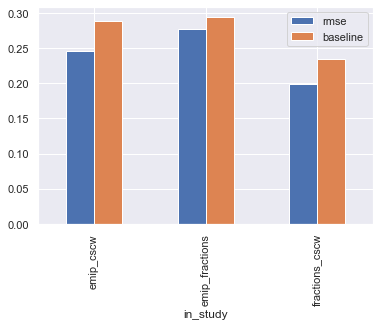

In [63]:
#MINIMUM RMSE PER DATASET
minimum_rmse = two_to_one_df.loc[two_to_one_df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

[Text(0, 0, 'eye_tracking'),
 Text(1, 0, 'all'),
 Text(2, 0, 'fixation_duration'),
 Text(3, 0, 'all'),
 Text(4, 0, 'pupil_diameter'),
 Text(5, 0, 'saccade_length'),
 Text(6, 0, 'saccade_duration'),
 Text(7, 0, 'fft'),
 Text(8, 0, 'eye_tracking'),
 Text(9, 0, 'saccade_duration'),
 Text(10, 0, 'Arma'),
 Text(11, 0, 'heatmaps'),
 Text(12, 0, 'saccade_duration'),
 Text(13, 0, 'heatmaps'),
 Text(14, 0, 'heatmaps'),
 Text(15, 0, 'markov'),
 Text(16, 0, 'fft'),
 Text(17, 0, 'garch'),
 Text(18, 0, 'saccade_duration'),
 Text(19, 0, 'eye_tracking'),
 Text(20, 0, 'saccade_duration'),
 Text(21, 0, 'saccade_length'),
 Text(22, 0, 'heatmaps'),
 Text(23, 0, 'markov'),
 Text(24, 0, 'heatmaps'),
 Text(25, 0, 'saccade_duration')]

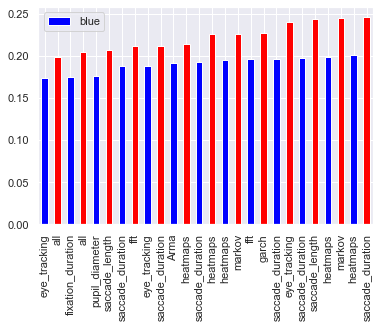

In [64]:
# TOP 13 RMSE with for one to one and 
smallest = two_to_one_df.nsmallest(13, "rmse")
smallest = smallest.reset_index()
smallest.index = 2*smallest.index +1
smallest_oto = one_to_one_df.nsmallest(13, "rmse")
smallest_oto = smallest_oto.reset_index()
smallest_oto.index = 2*smallest_oto.index
smallest = pd.concat([smallest, smallest_oto]).sort_index()


ax = smallest.loc[:,"rmse"].plot(kind="bar", color=['blue','red'], use_index=True)
ax.legend({"blue": "1t1", "red": "2to1"})
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [65]:
two_to_one_df.loc[:, "in_study"].unique()

array(['fractions_cscw', 'emip_fractions', 'emip_cscw'], dtype=object)

In [84]:
def bar_chart(df, ax, y, title, y_label, x_label, ticks_column):
    ax = df.plot(kind="bar", y=y, use_index=False, ax=ax)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.loc[:, ticks_column], rotation=90)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)


def side_by_side_bar_plot(dfs, titles, y, ticks, y_label, x_label):
    figures_per_row = min(len(dfs), 3)
    fig, axes = plt.subplots(nrows=len(dfs)//figures_per_row, ncols=figures_per_row)
    axes = axes.flatten()
    for df, ax, title in zip(dfs, axes, titles):
        bar_chart(df, ax, y, title, y_label, x_label, ticks)
    return fig

## DIMENSIONALITY REDUCTION

### BEST DIMENSIONALITY REDUCTION CONTEXT SENSITIVE 

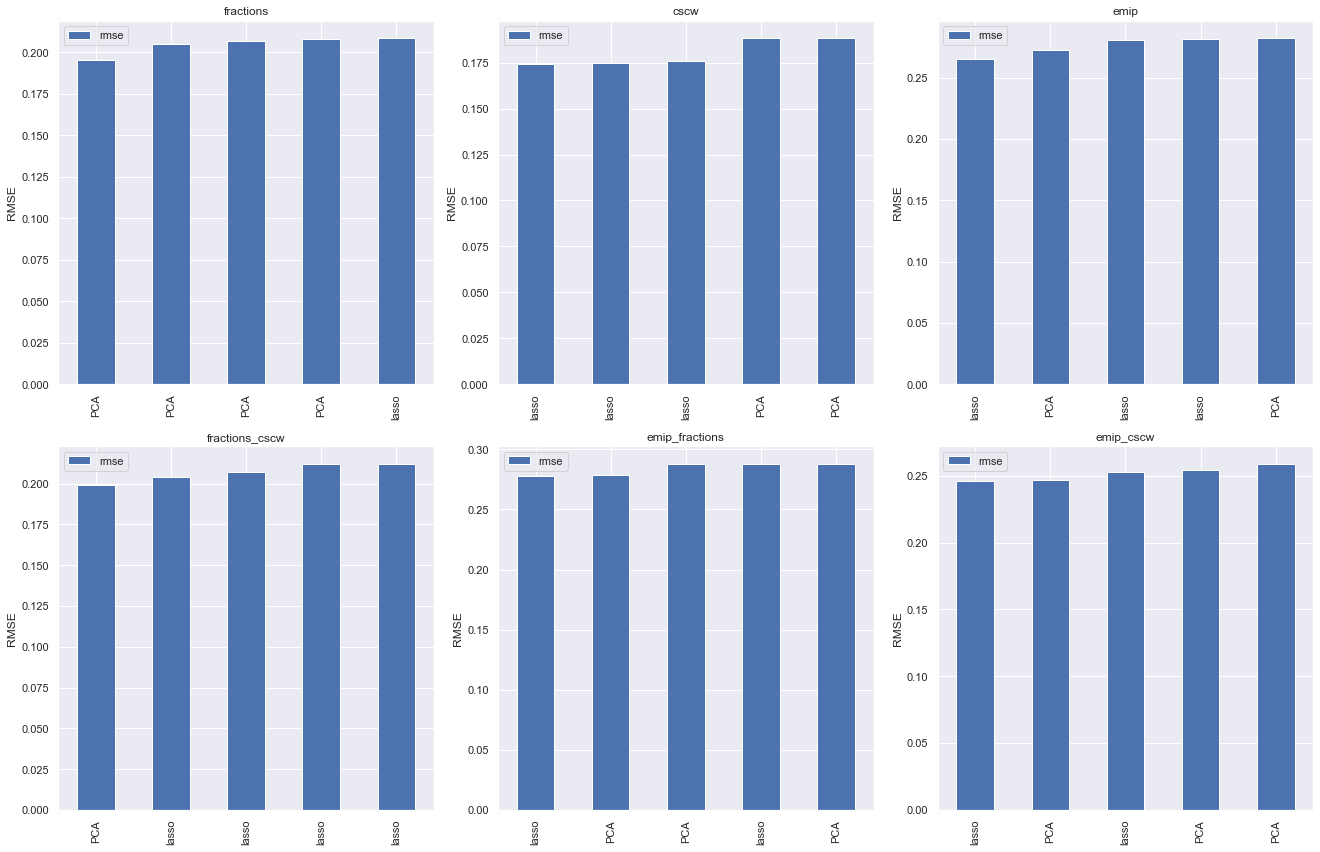

In [90]:
combined_df = pd.concat((one_to_one_df, two_to_one_df))

dfs_grouped_on_in_study = [combined_df[combined_df["in_study"] == dataset] for dataset in combined_df["in_study"].unique()]
dfs = [df.nsmallest(5, "rmse") for df in dfs_grouped_on_in_study] 
titles = [df.loc[:, "in_study"].iloc[0] for df in dfs_grouped_on_in_study]
fig = side_by_side_bar_plot(dfs, titles, y="rmse", y_label="RMSE", x_label="", ticks="dimensionality_reduction")

fig.set_size_inches(18.5, 12, forward=True)
fig.tight_layout()
fig.savefig("plots/dimensionality_reduction_context_sensitivity.jpg")


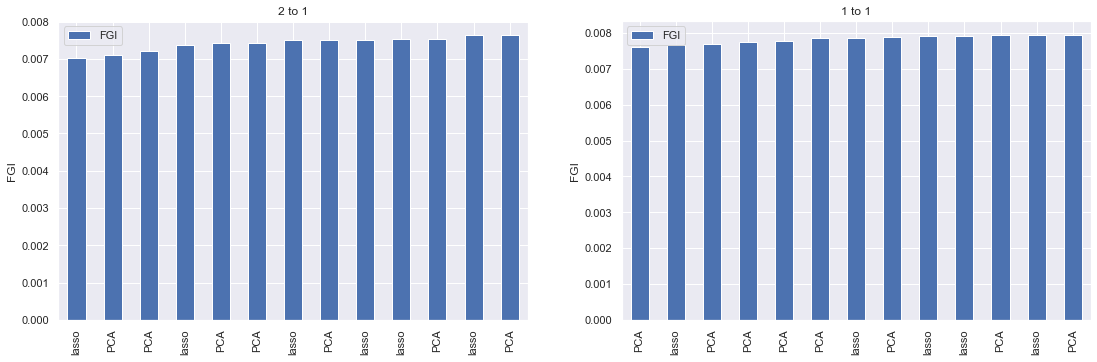

In [91]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_df.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_df.nsmallest(13, "FGI")
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]

fig = side_by_side_bar_plot(dfs, titles, y="FGI", y_label="FGI", x_label="", ticks="dimensionality_reduction")
fig.set_size_inches(18.5, 5.5, forward=True)
fig.savefig("plots/dimensionality_reduction_generalizability.jpg")


## FEATURES

###  Same training and testing context

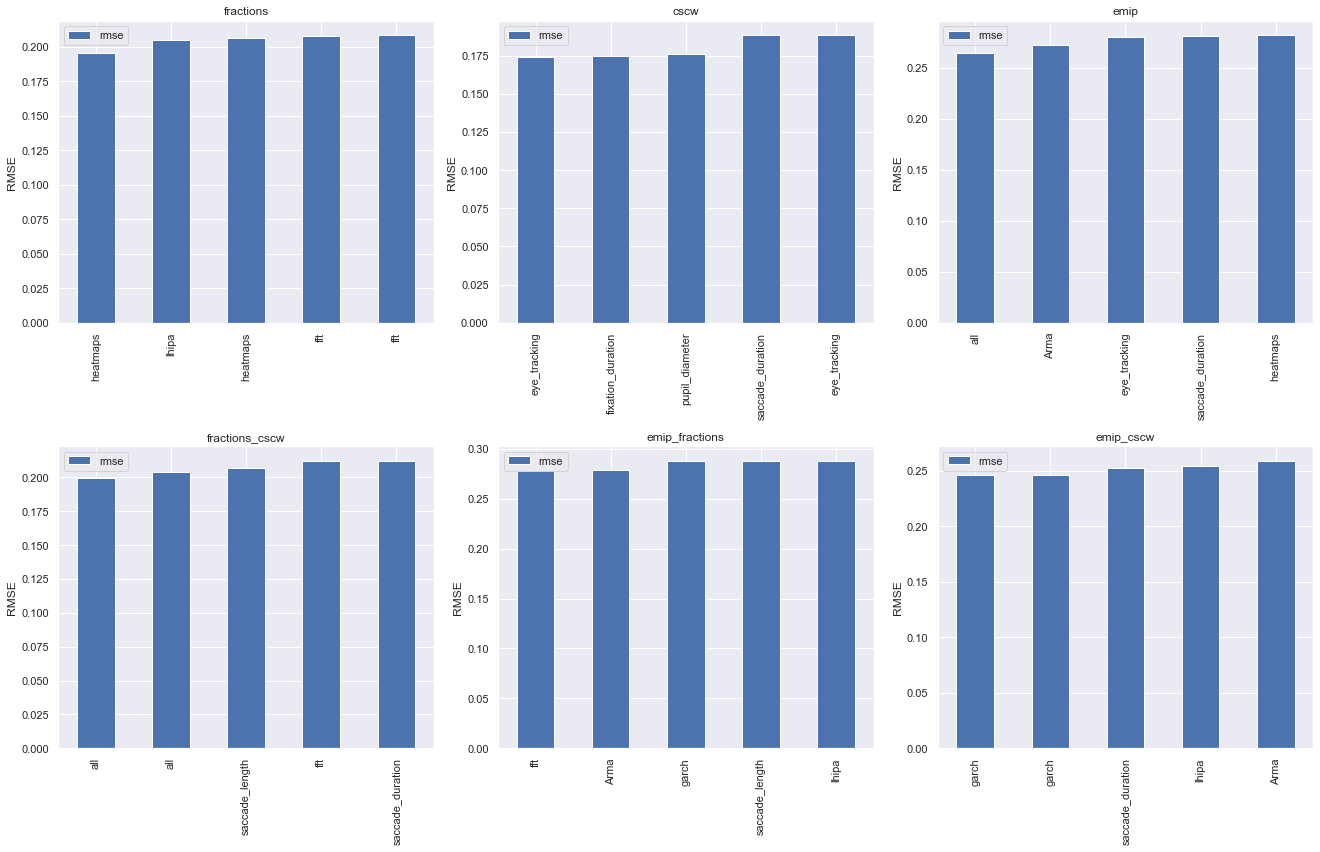

In [92]:
combined_df = pd.concat((one_to_one_df, two_to_one_df))

dfs_grouped_on_in_study = [combined_df[combined_df["in_study"] == dataset] for dataset in combined_df["in_study"].unique()]
dfs = [df.nsmallest(5, "rmse") for df in dfs_grouped_on_in_study] 
titles = [df.loc[:, "in_study"].iloc[0] for df in dfs_grouped_on_in_study]
fig = side_by_side_bar_plot(dfs, titles, y="rmse", y_label="RMSE", x_label="", ticks="feature_combinations")

fig.set_size_inches(18.5, 12, forward=True)
fig.tight_layout()
fig.savefig("plots/feature_groups_context_sensitivity.jpg")


###  Generalizability

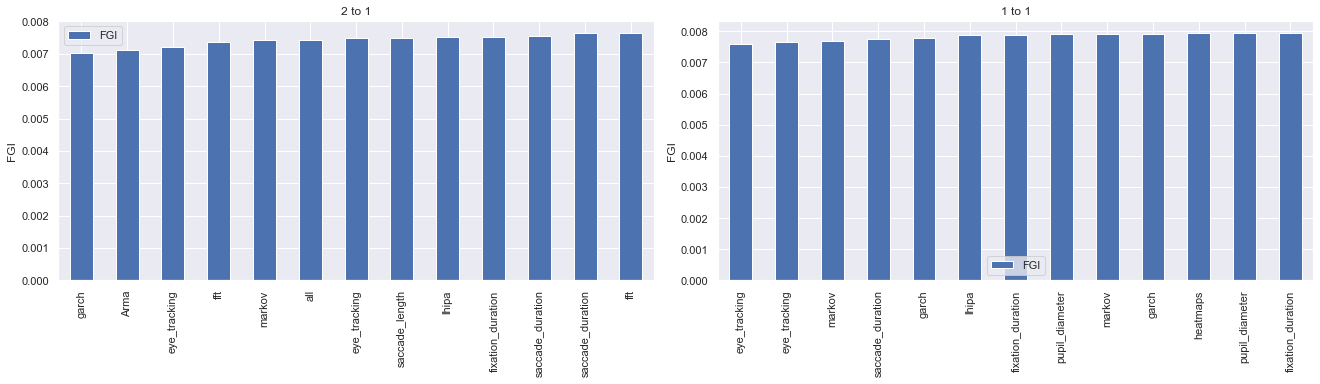

In [96]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_df.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_df.nsmallest(13, "FGI")
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]

fig = side_by_side_bar_plot(dfs, titles, y="FGI", y_label="FGI", x_label="", ticks="feature_combinations")
fig.set_size_inches(18.5, 5.5, forward=True)
fig.tight_layout()
fig.savefig("plots/feature_groups_generalizability.jpg")